In [1]:
# Name: example_basics.ipynb
# Authors: Stephan Meighen-Berger
# Basic example for the package, includes the typically used options
# For a full list of options, please check the config file

In [3]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
import sys
import pickle

In [4]:
# Adding path to module
sys.path.append("../")

In [5]:
# picture path
PICS = '../pics/'

In [6]:
# Module imports
from fourth_day import Fourth_Day, config

AttributeError: `np.infty` was removed in the NumPy 2.0 release. Use `np.inf` instead.

In [6]:
# ---------------------------------------------
# Some example settings
# For a full lost check the config file
# ---------------------------------------------
# Scenario Settings
# These are general settings pertaining to the simulation run
config['scenario']['population size'] = 10  # The starting population size
config['scenario']['duration'] = 75 * 1  # Total simulation time in seconds
config['scenario']['exclusion'] = True  # If an exclusion zone should be used (the detector)
config['scenario']['injection']['rate'] = 1e-1  #  Injection rate in per second, a distribution is constructed from this value
config['scenario']['injection']['y range'] = [0., 15.]  # The y-range of injection
config['scenario']['light prop'] = {  # Where the emitted light should be propagated to (typically the detector location)
            "switch": True,  # If light should be propagated
            "x_pos": 3.,  # The x-coordinates
            "y_pos": 0.5 * 15. - 0.15,  # The y-coordinates
        }
config['scenario']['detector'] = {  # detector specific properties, positions are defined as offsets from the light prop values
    "switch": True,  # If the detector should be modelled
    "type": "PMTSpec",  # Detector name, implemented types are given in the config
    "response": True,  # If a detector response should be used
    "acceptance": "Flat",  # Flat acceptance
    "mean detection prob": 0.5  # Used for the acceptance calculation
}
# ---------------------------------------------
# Organisms
# Organisms properties are defined here
config['organisms']['emission fraction'] = 0.1  # Amount of energy an organism uses per pulse
config['organisms']['alpha'] = 1e0  # Proportionality factor for the emission probability
config['organisms']["minimal shear stress"] = 0.005  # The minimal amount of shear stress needed to emit (generic units)
config["organisms"]["filter"] = 'depth'  # Method of filtering organisms (here depth)
config["organisms"]["depth filter"] = 10000.  # Organisms need to exist below this depth
# ---------------------------------------------
# Geometry
# These settings define the geometry of the system
# Typically a box (simulation volume) with a spherical exclusion zone (detector)
config['geometry']['volume'] = {
    'function': 'rectangle',
    'x_length': 30.,
    'y_length': 15.,
    'offset': None,
}
# Reduce the observation size to reduce the computational load
config['geometry']['observation'] = {
    'function': 'rectangle',
    'x_length': 30.,
    'y_length': 15.,
    "offset": np.array([0., 0.]),
}
# The detector volume
config['geometry']["exclusion"] = {
    "function": "sphere",
    "radius": 0.15,
    "x_pos": 3.,
    "y_pos": 0.5 * 15. - 0.15,
}
# ---------------------------------------------
# Water
# Properties of the current model
config['water']['model']['name'] = 'custom'  # Use a custom (non analytic) model
config['water']['model']['off set'] = np.array([0., 0.])  # Offset of the custom model
config['water']['model']['directory'] = "Parabola_5mm/run_10cm_npy/"  # The files used by the custom model
config['water']['model']['time step'] = 1.  # in Seconds

In [7]:
# Creating a fourth_day object
# Use this to interact with with the module
fd = Fourth_Day()

In [8]:
# Use this method if you need to download files.
# fd.load_data()

Starting the download. Please note this will take a while!
Depending on the current server usage this takes a few hours!


100%|██████████| 3612/3612 [00:00<00:00, 39054.30it/s]


In [9]:
# Launching solver
# This might take a while depending on the settings
# Check the log file (standard setting is in the run folder) for the current iteration
fd.sim()

In [10]:
# Example poplation state
# This includes all information needed for analyses except the light propagation and detector response
# For those values check "fd.measured"
fd.statistics[-1]

,species,pos_x,pos_y,velocity,angle,radius,energy,observed,max_emission,emission fraction,...,pulse mean,pulse sd,pulse size,pulse start,is_emitting,emission_duration,encounter photons,shear photons,photons,is_injected
0,long pulse 1,17.178393,0.080061,0.0,0.0,0.001135,1.0000,True,19.384904,0.1,...,2.0,1.5,1.500000e+00,False,False,-75.0,0,0.000000e+00,0.000000e+00,False
1,short pulse,15.608229,6.949855,0.0,0.0,0.001274,1.0000,True,15.038286,0.1,...,2.0,0.3,3.000000e-01,False,False,-75.0,0,0.000000e+00,0.000000e+00,False
2,short pulse,16.699355,5.714155,0.0,0.0,0.001250,1.0000,True,17.509604,0.1,...,2.0,0.3,3.000000e-01,False,False,-75.0,0,0.000000e+00,0.000000e+00,False
3,long pulse 1,30.070580,7.807291,0.0,0.0,0.001357,1.0000,False,14.713668,0.1,...,2.0,1.5,1.500000e+00,False,False,-59.0,0,0.000000e+00,0.000000e+00,False
4,example pulse 1,10.345970,5.586579,0.0,0.0,0.001336,1.0000,True,12.034175,0.1,...,2.0,1.5,1.500000e+00,False,False,-75.0,0,0.000000e+00,0.000000e+00,False
5,example pulse 1,18.392058,7.132072,0.0,0.0,0.001226,1.0000,True,7.485000,0.1,...,2.0,1.5,1.500000e+00,False,False,-75.0,0,0.000000e+00,0.000000e+00,False
6,example pulse 1,29.536660,12.953445,0.0,0.0,0.001536,1.0000,True,19.169354,0.1,...,2.0,1.5,1.500000e+00,False,False,-75.0,0,0.000000e+00,0.000000e+00,False
7,short pulse,12.269112,6.084132,0.0,0.0,0.001402,1.0000,True,17.066901,0.1,...,2.0,0.3,3.000000e-01,False,False,-75.0,0,0.000000e+00,0.000000e+00,False
8,short pulse,30.076426,6.607397,0.0,0.0,0.000405,1.0000,False,0.763870,0.1,...,2.0,0.3,3.000000e-01,False,False,-41.0,0,0.000000e+00,0.000000e+00,False
9,long pulse 1,30.028936,2.112713,0.0,0.0,0.000741,1.0000,False,13.610057,0.1,...,2.0,1.5,1.500000e+00,False,False,-64.0,0,0.000000e+00,0.000000e+00,False


In [11]:
# Plotting standards
std_size = 3.  # Size of the plot
fontsize = 10.  # Fontsize in the plot
lw=0.5  # Linewidth
h_length=0.2  # Handle length for the legends
export_dpi = 500  # Dpi for the image export

In [12]:
# Font style
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=False)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


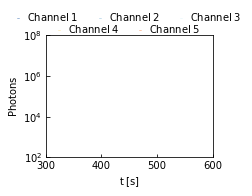

In [13]:
# ---------------------------------------------
# Detector light yields
# These are stored in fd.measured
# ---------------------------------------------
# The different detectors (each measuring different wavelengths here)
wavelengths = {
    "Detector 1": ["1", "#4575b4"],
    "Detector 5": ["2", "#91bfdb"],
    "Detector 8": ["3", "#e0f3f8"],
    "Detector 3": ["4", "#fee090"],
    "Detector 10": ["5", "#fc8d59"],
}
# ---------------------------------------------
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
# Plotting the different detector values
# Random noise (e.g. electric)
noise = {}
for detector in wavelengths.keys():
    noise[detector] = np.random.normal(1e3, 2e2, fd.measured[detector].values.shape)
for detector in wavelengths.keys():
    ax1.plot(fd.t,
             fd.measured[detector].values + noise[detector],
             lw=lw, label=r"$\mathrm{Channel\;%s}$" % wavelengths[detector][0], color=wavelengths[detector][1])
# Constructing and plotting the totals
total = fd.measured["Detector 1"].values + noise[detector]
for detector in wavelengths.keys():
    if detector == "Detector 1":
        continue
    total += fd.measured[detector].values + noise[detector]
ax1.plot(fd.t, total, color='k')
# ---------------------------------------------
# Plotting options
ax1.set_xscale('linear')
ax1.set_yscale('log')
ax1.set_xlabel(r'$\mathrm{t}\;[\mathrm{s}]$', fontsize=fontsize)
ax1.set_ylabel(r'$\mathrm{Photons}$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h[:3],l[:3], loc=9, bbox_to_anchor=(0.5, +1.27),
                  ncol=3, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
lgd2 = ax1.legend(h[3:],l[3:], loc=9, bbox_to_anchor=(0.5, +1.17),
                  ncol=3, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
ax1.set_ylim(1e2, 1e8)
ax1.set_xlim(300, 600)
plt.show()
# ---------------------------------------------
# Storing the image
figure.savefig(PICS + "MC_Example.png",
               bbox_inches='tight', dpi=export_dpi)

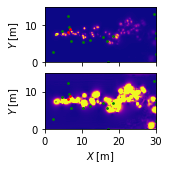

In [14]:
# ---------------------------------------------
# Creating a view plot
# This shows the water current and organisms (emitting or not)
# ---------------------------------------------
# The first view plot, this tries to show the individual vortices
figure, (ax1, ax2) = plt.subplots(2, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
# ---------------------------------------------
# Constructing the water current grid
courseness = 1000  # The plotting precision
# The grids used for the water current plot
x_grid = np.linspace(0., config['geometry']['volume']['x_length'], courseness)
y_grid = (
    np.linspace(0., config['geometry']['volume']['y_length'], courseness) +
    config['water']['model']['off set'][1]
)
X, Y = np.meshgrid(x_grid, y_grid)
all_points = []
for i in range(0, len(x_grid)):
    all_points.append(np.vstack((X[i], Y[i])).T)
# The water current
x_vel = []
y_vel = []
grad = []
for j in range(0, len(x_grid)):
    # x_vel_tmp, y_vel_tmp, vel_abs = fd._current.velocities(all_points[j], q + config['advanced']['starting step'])
    grad_tmp = fd._current.gradients(all_points[j], 600)
    # x_vel.append(x_vel_tmp)
    # y_vel.append(y_vel_tmp)
    grad.append(grad_tmp)
grad = np.array(grad)
# ---------------------------------------------
# Creating the plots
vmax = 1.
vmin = 0.
# Water current
ax1.imshow(grad.reshape(courseness, courseness), cmap='plasma',
           vmax=vmax, vmin=vmin, extent=[0., 30., 0., 15.])
# The organisms
emission_mask = fd.statistics[-1].loc[:, 'is_emitting']
# Not emitting
ax1.scatter(fd.statistics[-1].loc[~emission_mask, 'pos_x'].values,
            fd.statistics[-1].loc[~emission_mask, 'pos_y'].values,
            color='g',
            s=3.
)
# Emitting
ax1.scatter(fd.statistics[-1].loc[emission_mask, 'pos_x'].values,
            fd.statistics[-1].loc[emission_mask, 'pos_y'].values,
            color='r',
            s=3.
)
# ---------------------------------------------
# Visualizing the detector
# Exclusion
theta = np.linspace(0, 2*np.pi, 50)
r = config['geometry']['exclusion']['radius']  # The detector radius
x1 = r*np.cos(theta)  # The plotting circle x
x2 = r*np.sin(theta)  # The plotting circle y
# The actual detector plot
ax1.plot(x1 + config['geometry']['exclusion']['x_pos'], x2 + config['geometry']['exclusion']['y_pos'],
         lw=lw/2, color='k')
# ---------------------------------------------
# Additional options
ax1.set_ylabel(r'$Y\;[\mathrm{m}]$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize)
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize)
ax1.set_xlim(0., 30.)
ax1.set_ylim(0., 15.)
# ---------------------------------------------
# The general area where emission is likely visualized
vmax = 0.05
vmin = 0.
# Water current
ax2.imshow(grad.reshape(courseness, courseness), cmap='plasma',
           vmax=vmax, vmin=vmin, extent=[0., 30., 0., 15.])
# The organisms
emission_mask = fd.statistics[-1].loc[:, 'is_emitting']
# Not emitting
ax2.scatter(fd.statistics[-1].loc[~emission_mask, 'pos_x'].values,
            fd.statistics[-1].loc[~emission_mask, 'pos_y'].values,
            color='g',
            s=3.
)
# Emitting
ax2.scatter(fd.statistics[-1].loc[emission_mask, 'pos_x'].values,
            fd.statistics[-1].loc[emission_mask, 'pos_y'].values,
            color='r',
            s=3.
)
# ---------------------------------------------
# Exclusion
theta = np.linspace(0, 2*np.pi, 50)
r = config['geometry']['exclusion']['radius']
x1 = r*np.cos(theta)
x2 = r*np.sin(theta)
ax2.plot(x1 + config['geometry']['exclusion']['x_pos'], x2 + config['geometry']['exclusion']['y_pos'],
         lw=lw/2, color='k')
# ---------------------------------------------
# Additional options
ax2.set_xlabel(r'$X\;[\mathrm{m}]$', fontsize=fontsize)
ax2.set_ylabel(r'$Y\;[\mathrm{m}]$', fontsize=fontsize)
ax2.tick_params(axis = 'both', which = 'major', labelsize=fontsize)
ax2.tick_params(axis = 'both', which = 'minor', labelsize=fontsize)
ax2.set_xlim(0., 30.)
ax2.set_ylim(0., 15.)
plt.show()
# ---------------------------------------------
# Storing
figure.savefig(PICS + "MC_Pop.png",
               bbox_inches='tight', dpi=export_dpi)